# Glimpse at Water Usage Data
** author:** Xiaomeng Dong

In [1]:
import pandas as pd
import pylab as pl
from __future__ import print_function, division
%pylab inline

__author__ = "Xiaomeng Dong"

Populating the interactive namespace from numpy and matplotlib


### 1. Read downloaded data ranging from 6/1/2017 to 6/1/2018

In [2]:
df = pd.read_csv('Water.csv')
df.head()

,occupant_code,debtor_number,category_code,category_description,bill_code,utility_type,start_date,end_date,current_read_date,last_read_date,...,block_address,street_side,zip_code,census_block_id,street_centroid_lat,street_centroid_long,street_centroid_wkt,street_centroid,street_segment_wkt,id
0,1,10281,CL,CITY LANDSCAPE,WANR1,W,1996/07/31,NaN,2017/10/03,2017/08/02,...,NaN,NaN,90405.0,NaN,NaN,NaN,NaN,NaN,NaN,43415311378512017-10-03
1,6,83218,SF,SINGLE FAMILY,WASF1,W,2015/04/23,NaN,2017/10/03,2017/08/02,...,NaN,even,90405.0,6.037702e+13,34.008976,-118.461377,POINT (-118.461376646015 34.0089758080045),"(34.0089758080045, -118.461376646015)",LINESTRING (-118.461673053532 34.0093299710535...,43408361378512017-10-03
2,11,33525,SF,SINGLE FAMILY,WASF1,W,2017/09/28,NaN,2017/10/03,2017/09/28,...,NaN,even,90405.0,6.037702e+13,34.008976,-118.461377,POINT (-118.461376646015 34.0089758080045),"(34.0089758080045, -118.461376646015)",LINESTRING (-118.461673053532 34.0093299710535...,434103111378512017-10-03
3,3,63603,SF,SINGLE FAMILY,WASF1,W,1983/08/30,NaN,2017/10/03,2017/08/02,...,NaN,odd,90405.0,6.037702e+13,34.008976,-118.461377,POINT (-118.461376646015 34.0089758080045),"(34.0089758080045, -118.461376646015)",LINESTRING (-118.461673053532 34.0093299710535...,43412331378512017-10-03
4,5,82719,CO,COMMERCIAL,WANR1,W,2014/09/30,NaN,2017/11/02,2017/09/01,...,NaN,NaN,90401.0,NaN,NaN,NaN,NaN,NaN,NaN,2238251391012017-11-02


In [3]:
df.category_description.unique()

array(['CITY LANDSCAPE', 'SINGLE FAMILY', 'COMMERCIAL', 'OUTSIDE CITY',
       'FOURPLEX', 'MULTI UNIT DWELLING', 'CHURCH', 'MUNICIPAL', 'FIRE',
       'TRIPLEX', 'SF MULTI UNIT DWELL', 'LANDSCAPE COMMERCIAL', 'DUPLEX',
       'HOUSE METER', 'LANDSCAPE  RESIDENT', 'MIXED USE', 'CITY MUNICIPAL',
       'PUBLIC SCHOOL', 'BUSINESS IN RESIDENC', 'Water No Bill',
       'FRESH WATER', 'STATE FREEWAY', 'RECLAIMED WATER', 'CITY FIRE',
       'LANDSCAPE PUB SCHOOL'], dtype=object)

In [4]:
df.columns

Index(['occupant_code', 'debtor_number', 'category_code',
       'category_description', 'bill_code', 'utility_type', 'start_date',
       'end_date', 'current_read_date', 'last_read_date', 'usage_hcf',
       'usage_gallons', 'net', 'bill_date', 'batch_number', 'street_name',
       'block_address', 'street_side', 'zip_code', 'census_block_id',
       'street_centroid_lat', 'street_centroid_long', 'street_centroid_wkt',
       'street_centroid', 'street_segment_wkt', 'id'],
      dtype='object')

In [5]:
# Drop columns which aren't needed.
dff = df.drop(['debtor_number','end_date','batch_number', 'street_name',
       'block_address', 'street_side', 'zip_code', 'census_block_id',
       'street_centroid_lat', 'street_centroid_long', 'street_centroid_wkt',
       'street_centroid', 'street_segment_wkt', 'id'], 
        axis=1, inplace = False)

In [6]:
dff.isnull().sum()

occupant_code            0
category_code            0
category_description     0
bill_code               26
utility_type             0
start_date               0
current_read_date        0
last_read_date           0
usage_hcf               47
usage_gallons           47
net                      0
bill_date                0
dtype: int64

In [7]:
dff.dropna().head()

,occupant_code,category_code,category_description,bill_code,utility_type,start_date,current_read_date,last_read_date,usage_hcf,usage_gallons,net,bill_date
0,1,CL,CITY LANDSCAPE,WANR1,W,1996/07/31,2017/10/03,2017/08/02,5.0,3740.0,21.35,2017/10/06
1,6,SF,SINGLE FAMILY,WASF1,W,2015/04/23,2017/10/03,2017/08/02,6.0,4488.0,18.06,2017/10/06
2,11,SF,SINGLE FAMILY,WASF1,W,2017/09/28,2017/10/03,2017/09/28,3.0,2244.0,9.03,2017/10/06
3,3,SF,SINGLE FAMILY,WASF1,W,1983/08/30,2017/10/03,2017/08/02,39.0,29172.0,154.64,2017/10/06
4,5,CO,COMMERCIAL,WANR1,W,2014/09/30,2017/11/02,2017/09/01,2.0,1496.0,8.54,2017/11/08


Text(0.5,1,'Usage VS Bills')

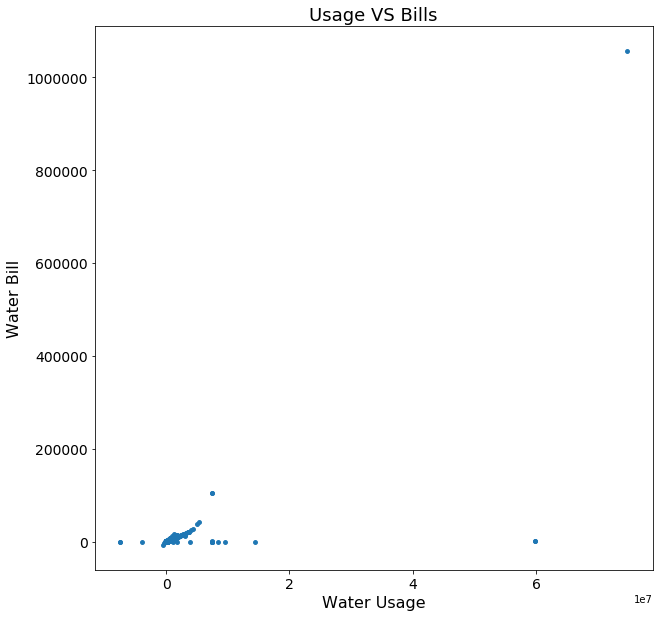

In [8]:
# Plot water consumption.

ax_water = dff.plot(x='usage_gallons', y='net', kind='scatter', s=15, figsize=(10,10), fontsize=14)
ax_water.set_xlabel('Water Usage', fontsize=16)
ax_water.set_ylabel('Water Bill', fontsize=16)
ax_water.set_title('Usage VS Bills', fontsize=18)

#### Figure1. Scatters of water consumptions and bills of seleceted dates.

In [9]:
# Report outliers
dff[dff.usage_gallons > 2*1e7]

,occupant_code,category_code,category_description,bill_code,utility_type,start_date,current_read_date,last_read_date,usage_hcf,usage_gallons,net,bill_date
96,1,MX,MULTI UNIT DWELLING,WAMF3,W,2006/07/01,2017/06/30,2017/05/25,99999.0,74799252.0,1056271.93,2017/07/03
19425,2,FI,FIRE,WAFI7,W,1991/09/24,2017/11/06,2017/09/05,79972.0,59819056.0,735.42,2017/11/15
19463,2,FI,FIRE,WAFI7,W,2016/12/23,2017/11/06,2017/09/05,79988.0,59831024.0,735.42,2017/11/15


In [10]:
# Plot water consumption.

water = dff[dff.usage_gallons < 2*1e7]

Text(0.5,1,'Usage VS Bills')

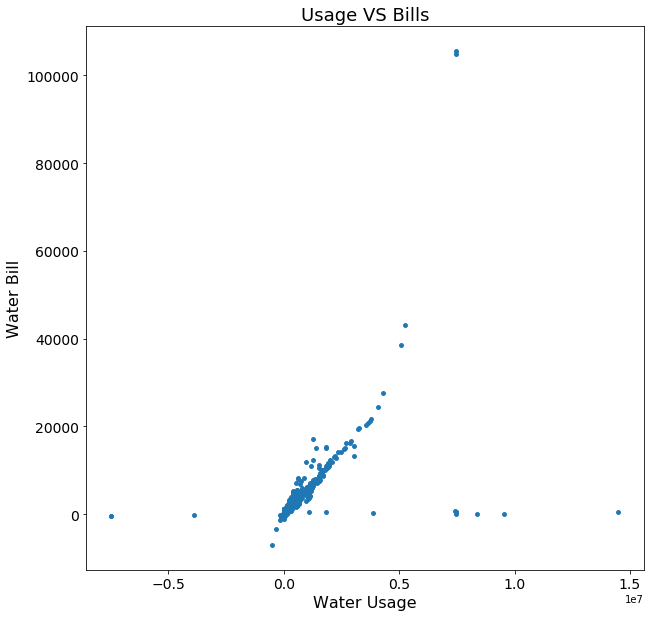

In [11]:
ax = water.plot(x='usage_gallons', y='net', kind='scatter', s=15, figsize=(10,10), fontsize=14)
ax.set_xlabel('Water Usage', fontsize=16)
ax.set_ylabel('Water Bill', fontsize=16)
ax.set_title('Usage VS Bills', fontsize=18)

#### Figure 2. Scatters of water consumptions and bills of seleceted dates without outliers.

### 2.Plot water consumptions of different categories

In [12]:
mylist = water['category_description'].unique()

In [13]:
mylist

array(['CITY LANDSCAPE', 'SINGLE FAMILY', 'COMMERCIAL', 'OUTSIDE CITY',
       'FOURPLEX', 'MULTI UNIT DWELLING', 'CHURCH', 'MUNICIPAL', 'FIRE',
       'TRIPLEX', 'SF MULTI UNIT DWELL', 'LANDSCAPE COMMERCIAL', 'DUPLEX',
       'HOUSE METER', 'LANDSCAPE  RESIDENT', 'MIXED USE', 'CITY MUNICIPAL',
       'PUBLIC SCHOOL', 'BUSINESS IN RESIDENC', 'Water No Bill',
       'FRESH WATER', 'STATE FREEWAY', 'RECLAIMED WATER', 'CITY FIRE',
       'LANDSCAPE PUB SCHOOL'], dtype=object)

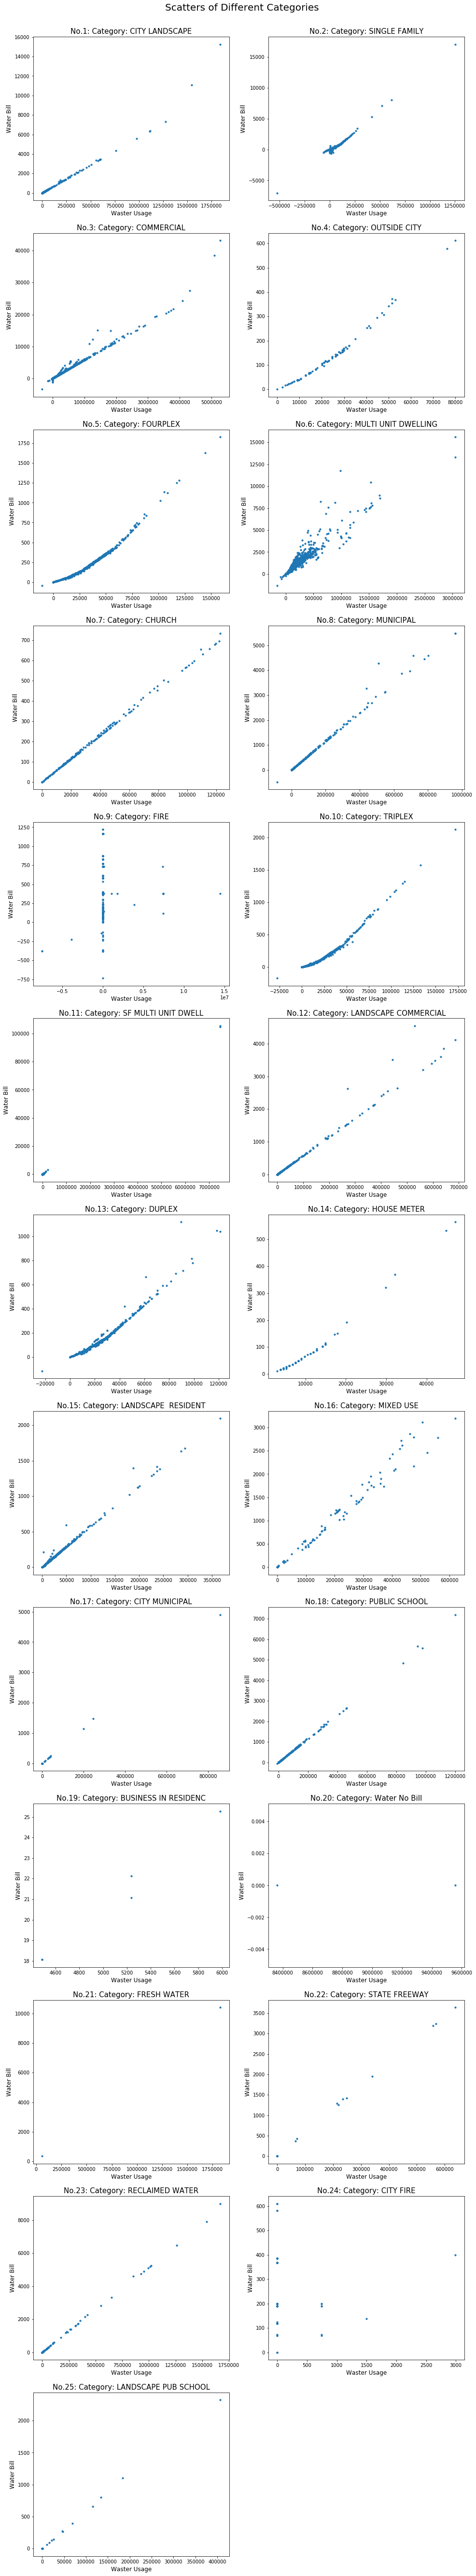

In [14]:
fig = pl.figure(figsize(16,96))
pl.suptitle('Scatters of Different Categories', fontsize=20, y=0.89)
for i, v in enumerate(mylist):
    ax = fig.add_subplot(13,2,i+1)
    water[water.category_description == v].plot(ax=ax, x='usage_gallons', y='net', kind='scatter', s=10)
    ax.set_title('No.{}: Category: {}'.format(i+1,mylist[i]), fontsize=15)
    ax.set_xlabel('Waster Usage', fontsize=12)
    ax.set_ylabel('Water Bill', fontsize=12)
pl.show()

#### Figure 3. Scatters of water consumptions and bills in different categories.